In [44]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as scp

In [19]:
from data_load import graph_data as gen
dataset=gen(n_data=1000, restart=1)
idx_lists = dataset.index_lists

Removed and ready to reload
Connecting to db-file
Loading Muons
Reading files
Splitting data to events
Generating adjacency matrices


C:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RobustScaler from version 0.19.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(



Saving dataset
Loading data to memory


In [20]:
dataset_train = dataset[idx_lists[0]]
dataset_val   = dataset[idx_lists[1]]
dataset_test  = dataset[idx_lists[2]]

In [24]:
dt=dataset_train

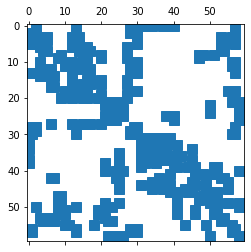

In [29]:
X, A=dt[0].x, dt[0].a
plt.spy(A)

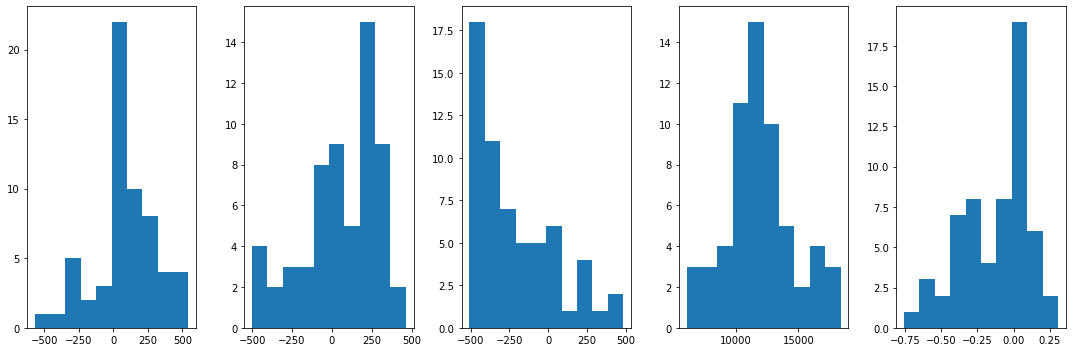

In [54]:
dx, dy, dz, t, q= X[:,0], X[:,1], X[:,2], X[:,3], X[:,4]
fig, ax=plt.subplots(nrows=1, ncols=5, figsize=(15,5))
for i in range(len(X[0])):
    ax[i].hist(X[:,i])
fig.tight_layout()
adj=list(zip(ix,iy))

In [120]:
G=nx.Graph()
for i in np.arange(len(X[:,0])):
    G.add_node(i, x=X[i,0], y=X[i,1], z=X[i,2], t=X[i,3], q=X[i,4], pos2d=[X[i,0], X[i,1]] ,pos3d=[X[i,0], X[i,1],X[i,2]])
G.add_edges_from(adj)

In [121]:
# np.unique(np.array(G.degree())[:,1]/len(np.array(G.degree())[:,1]))
np.unique(np.array(G.degree())[:,1])

array([ 6,  7,  8,  9, 10, 11, 12])

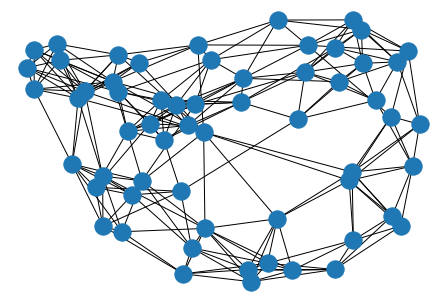

In [122]:
# plt.subplot(111)
nx.draw(G)

In [123]:
nx.density(G)

0.13502824858757062

In [124]:
nx.is_connected(G)

True

In [125]:
nx.degree_centrality(G)

{0: 0.1016949152542373,
 1: 0.13559322033898305,
 2: 0.11864406779661017,
 3: 0.13559322033898305,
 4: 0.15254237288135594,
 5: 0.15254237288135594,
 6: 0.13559322033898305,
 7: 0.11864406779661017,
 8: 0.11864406779661017,
 9: 0.11864406779661017,
 10: 0.1864406779661017,
 11: 0.13559322033898305,
 12: 0.1864406779661017,
 13: 0.15254237288135594,
 14: 0.1016949152542373,
 15: 0.13559322033898305,
 16: 0.13559322033898305,
 17: 0.11864406779661017,
 18: 0.1016949152542373,
 19: 0.13559322033898305,
 20: 0.11864406779661017,
 21: 0.1694915254237288,
 22: 0.15254237288135594,
 23: 0.13559322033898305,
 24: 0.13559322033898305,
 25: 0.1694915254237288,
 26: 0.11864406779661017,
 27: 0.15254237288135594,
 28: 0.13559322033898305,
 29: 0.11864406779661017,
 30: 0.2033898305084746,
 31: 0.13559322033898305,
 32: 0.13559322033898305,
 33: 0.1016949152542373,
 34: 0.13559322033898305,
 35: 0.1016949152542373,
 36: 0.1016949152542373,
 37: 0.13559322033898305,
 38: 0.1694915254237288,
 39: 0.1

In [126]:
[len(c) for c in nx.connected_components(G)] #redundant if connected

[60]

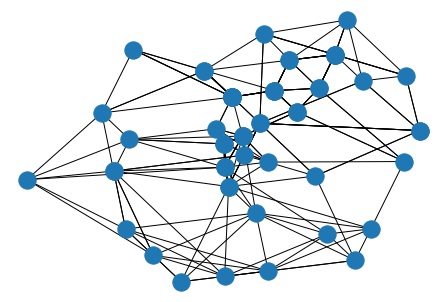

In [129]:
#2d plot x,y
nx.draw(G, pos=nx.get_node_attributes(G, 'pos2d')) 

Plotting 3d graph

In [130]:
from mpl_toolkits.mplot3d import Axes3D

In [137]:
def plot_3d(G, angle, save=False):
    # Get node positions
    pos = nx.get_node_attributes(G, 'pos3d')
    
    # Get number of nodes
    n = G.number_of_nodes()
    # Get the maximum number of edges adjacent to a single node
    edge_max = max([G.degree(i) for i in range(n)])
    # Define color range proportional to number of edges adjacent to a single node
    colors = [plt.cm.plasma(G.degree(i)/edge_max) for i in range(n)] 
    # 3D network plot
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)
        
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for key, value in pos.items():
            xi = value[0]
            yi = value[1]
            zi = value[2]
            
            # Scatter plot
            ax.scatter(xi, yi, zi, c=colors[key], s=20+20*G.degree(key), edgecolors='k', alpha=0.7)
        
        # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
        # Those two points are the extrema of the line to be plotted
        for i,j in enumerate(G.edges()):
            x = np.array((pos[j[0]][0], pos[j[1]][0]))
            y = np.array((pos[j[0]][1], pos[j[1]][1]))
            z = np.array((pos[j[0]][2], pos[j[1]][2]))
        
        # Plot the connecting lines
            ax.plot(x, y, z, c='black', alpha=0.5)
    
    # Set the initial view
    ax.view_init(30, angle)
    # Hide the axes
    ax.set_axis_off()
    if save:
     plt.savefig('graph3dtest.png')
     plt.close('all')
    else:
      plt.show()

    return

In [141]:
# for a in range(0,201):
    
#     plot_3d(G, a)

In [142]:
pos = nx.get_node_attributes(G, 'pos3d')
